In [ ]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
df=pd.read_csv("diabetes.csv" )
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**RANDOM FOREST CLASSIFIER WITH LIME AND SHAP**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



# Separate Features and Target Variables
X = df.drop(columns='Outcome')
y = df['Outcome']

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                    stratify =y,
                                                    random_state = 13)

# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)


# Make prediction on the testing data
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       163
           1       0.58      0.69      0.63        68

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.78      0.76      0.77       231



In [ ]:
!pip install eli5


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fee8c5d07aa5ff11e8c28b7ad9f3eaddc26238748a0b5de42acca10b8ee928c6
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular

# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['No diabetes', 'Has diabetes']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names = feature_names,
                                 class_names = class_names, mode = 'classification')

In [ ]:
### Single instance explanation

#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_train.iloc[2], rf_clf.predict_proba)

# show the result of the model's explaination
explaination.show_in_notebook(show_table = True, show_all = False)

In [ ]:
### Single instance explanation

#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[67], rf_clf.predict_proba)

# show the result of the model's explaination
explaination.show_in_notebook(show_table = True, show_all = False)

In [ ]:
!pip install shap

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00


Variable Importance Plot - Global Interpretation


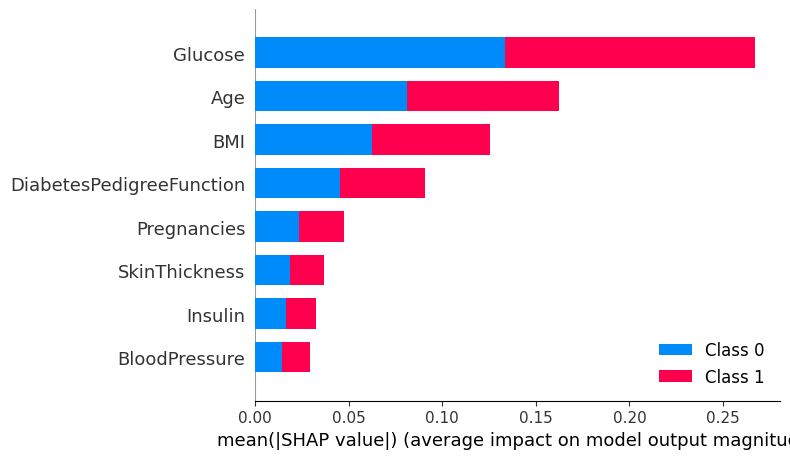

In [ ]:
import shap
from shap import TreeExplainer
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = TreeExplainer(rf_clf)

"""
Compute shap_values for all of X_test rather instead of
a single row, to have more data for plot.
"""
shap_values = explainer.shap_values(X_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)


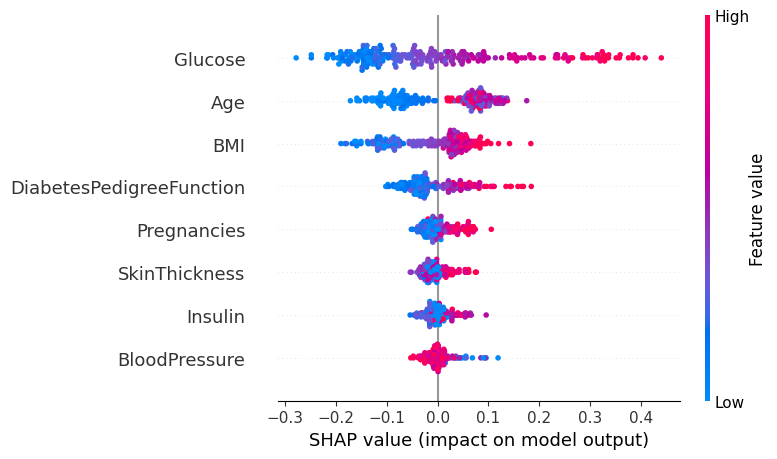

In [ ]:
# Summary Plot Deep-Dive on Label 1
shap.summary_plot(shap_values[1], X_test)

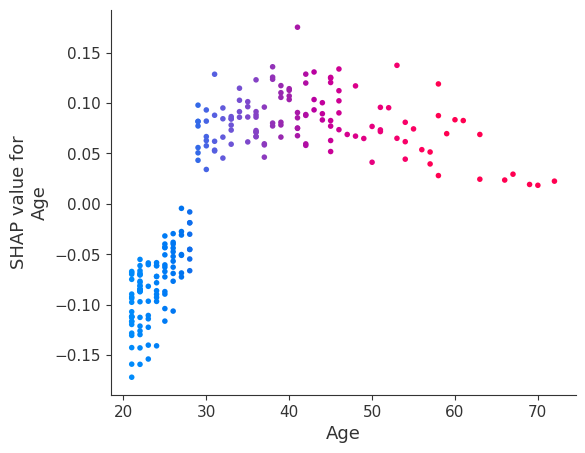

In [ ]:
# Dependence Plot on Age feature
shap.dependence_plot('Age', shap_values[1], X_test, interaction_index="Age")

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_train.iloc[:,1:10])

**XGBOOST WITH ELIF**

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from xgboost import XGBClassifier, plot_importance

In [ ]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                    stratify =y,
                                                    random_state = 13)

In [ ]:
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [ ]:
# ML in two lines ;)
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=33, ...)

In [ ]:
# make predictions for test data
xgb_predictions = xgb.predict(X_test)
y_pred = xgb_predictions

In [ ]:
# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81       158
           1       0.58      0.64      0.61        73

    accuracy                           0.74       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.75      0.74      0.74       231



In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
eli5.show_weights(xgb.get_booster(), top=15)

Fig. Above shows that glucose, BMI, AGE, INSULIN and thal are 4 key factors. The weight of "ca" is 0.1044 ± 0.0280. Model
performance is reduced by random shuffling by 0.1044 and Performance is split from one to next reversal by 0.0280.

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist(),top=13)

Highly black figures are the most important factors, and those that look down with light shades are less important. The
first number in each row indicates how much the performance of the model decreased by random shuffling (in this case, using
"precision" as the performance metric). Random measurement in calculating the value of permits is done by repeating the
process with multiple shifts. The number after ± measures how performance varies from one setup to the next.

In [ ]:
 #Get the class names
class_names = ['No diabetes', 'Has diabetes']

# Get the feature names
feature_names = list(X_train.columns)

In [ ]:
eli5.show_prediction(xgb,X_test.iloc[0],
                     feature_names= list(X_train.columns), target_names= class_names)

In [ ]:
eli5.show_prediction(xgb,X_test.iloc[1],
                     feature_names= list(X_train.columns), target_names= class_names)

## **SHAP ON LOGISTIC REGRESSION**

In [ ]:
df=pd.read_csv("diabetes.csv" )
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [ ]:
log_reg = LogisticRegression(penalty="l2",C=1.0)
log_reg.fit(X_train,y_train)
final_preds=log_reg.predict(X_test)
print(f1_score(y_test, final_preds))
print(accuracy_score(y_test,final_preds))

0.6823529411764706
0.8246753246753247


##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [ ]:
import shap
explainer = shap.LinearExplainer(log_reg, X_train)
shap_values = explainer.shap_values(X_test)
pd.DataFrame(shap_values, columns=X_test.columns).head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.277216  2.699140      -0.096725       0.060453  0.122497  0.937949   
1    -0.186325 -0.448545      -0.068810       0.022994 -0.021702  0.108695   
2    -0.004545 -1.509178       0.098679      -0.063450  0.122497  0.144362   
3     0.086346  1.570079      -0.040895      -0.008702 -0.129851 -0.586809   
4    -0.368106 -0.311689       0.056807      -0.063450  0.122497 -0.693809   

   DiabetesPedigreeFunction       Age  
0                  0.713671 -0.187043  
1                 -0.101558 -0.171365  
2                 -0.112263 -0.140008  
3                  0.049136  0.267630  
4                  0.109249 -0.045938

In [ ]:
print('Expected Value:', explainer.expected_value)

Expected Value: -0.7138246039576881


The above matrix includes our "SHAP" values. They are basically coefficients representing the importance of those features in determining whether the patient has heart disease or not. Positive values direct that prediction to 1 when negatives do the opposite. If the sum of all individual coefficients exceeds base value which is approximately 0.33445 here, prediction appears as 1. If it cannot exceed the base value, prediction is 0.

Local explanation: Each row has its coefficients and they show us how are the related features contribute to prediction of that specific row.

Rather than examining things locally, if we want to see global (overall) feature importances, we could sum up and average all the columns individually.


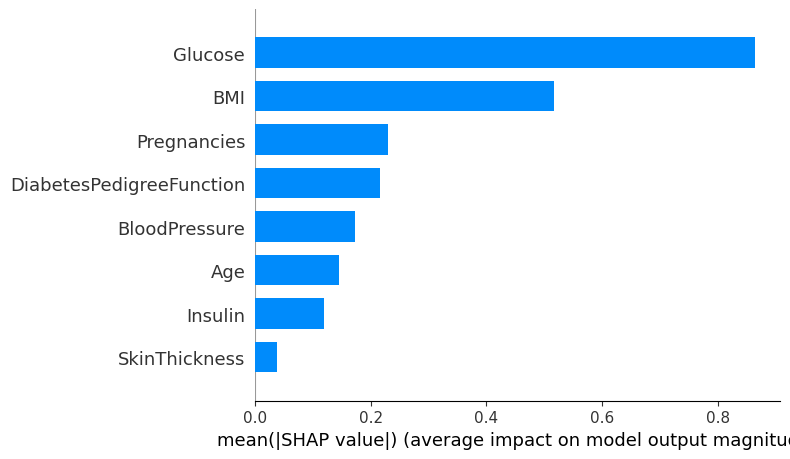

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
print("Test data (actual observation): {}".format(y_test.iloc[1]))
print("Model's prediction: {}".format(final_preds[1]))

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1, :], X_test.iloc[1, :])

Test data (actual observation): 0
Model's prediction: 0


## **#EXPLAINAR DASHBOARD#**

In [ ]:
!pip install explainerdashboard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.8 MB/s eta 0:00:00


In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=50, max_depth=13)
model.fit(X_train, y_train)

explainer = ClassifierExplainer(model, X_test, y_test)

NameError: ignored

In [ ]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You

TypeError: ignored

In [ ]:
! pip install omnixai

In [ ]:
import os
import pandas as pd
import numpy as np
from omnixai.data.tabular import Tabular
from omnixai.explainers.data import DataAnalyzer

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes (2).csv


{'diabetes (2).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

In [ ]:
df=pd.read_csv("diabetes.csv" )
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Separate Features and Target Variables
X = df.drop(columns='Outcome')
y = df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
feature_names = df.columns
categorical_columns = ['gender','ever_married','work_type','Residence_type','smoking_status']
tabular_data = Tabular(
    df,
    feature_columns=feature_names,
    categorical_columns=categorical_columns,
    target_column='stroke'

In [ ]:
explainer = DataAnalyzer(
    explainers=["correlation", "mutual", "chi2"],
    data= X
)

TypeError: ignored